In [1]:
import sys
sys.path.append('../.')
sys.path.append('../../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load data**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'ecoli'
X = pd.read_csv('../data/ecoli.csv')
ind = list(range(len(X.columns)))
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.027759,0.122599,0.264658,0.153671,-0.043405,-0.542246,0.619729,0.084389,-0.033762,0.077002,...,-1.156587,1.542883,-0.043889,-0.338571,-0.430860,-0.336886,-0.222453,0.315515,0.629529,0.488032
1,0.645966,-1.182445,-0.297893,-0.958127,-1.348025,0.239957,0.669959,-2.574957,-1.916479,-2.269440,...,0.473894,-0.614861,-2.270004,-1.746693,-1.686743,-2.147293,-2.143699,-2.509647,-2.754116,-2.406968
2,-0.878432,0.415826,-0.418150,0.188152,0.720372,-0.339575,0.828943,0.127842,1.275507,1.133740,...,1.014847,-1.652255,0.251795,0.320190,0.420012,0.150618,-0.217249,0.413813,0.236786,-0.205489
3,-0.458864,0.296419,0.381965,-0.282977,1.698835,0.027809,-1.067956,-2.038131,-0.197604,-0.155425,...,-0.401261,1.322398,-0.196608,-0.457251,-0.027710,-0.278149,0.004377,-0.212255,-0.489394,-0.719893
4,-0.687974,0.685775,0.989306,0.398356,1.347598,-1.213816,-0.896065,-0.525506,-0.363537,0.036631,...,2.540371,-1.535672,-1.128562,-0.764837,-1.085189,-1.031513,-1.461310,-1.059138,-0.743434,-0.567452


**Fit model**

In [3]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

/home/rob/miniconda3/envs/goggle3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    decoder_arch='gcn',
    graph_prior=None,
    prior_mask=None,
    device='cuda',
    beta=0.1,
    learning_rate=0.01,
    seed=0
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=46, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=46, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=46, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=64, out=32, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=32, out=1, normalization=both, activation=None)
    )
  )
)

In [5]:
gen.fit(X_train)

[Epoch 100/1000, patience  3] train: 19.973, val: 19.928
[Epoch 200/1000, patience  3] train: 14.970, val: 15.172
[Epoch 300/1000, patience  1] train: 13.146, val: 13.001
[Epoch 400/1000, patience  3] train: 12.793, val: 12.747
[Epoch 500/1000, patience 19] train: 12.496, val: 12.424
Training terminated after 530 epochs


**Evaluate synthetic data**

In [6]:
X_synth = gen.sample(X_test)
X_synth.head()

,eutG,sucA,atpG,flgD,sucD,yhdM,dnaJ,gltA,b1191,ygcE,...,pspA,nmpC,yheI,ycgX,dnaG,folK,b1963,dnaK,mopB,ftsJ
0,-0.809335,0.115985,0.172797,0.139875,0.249129,-0.499557,-0.565968,0.156127,-1.185997,-0.828669,...,0.655337,-0.257641,-1.260544,-1.069169,-1.115144,-1.274064,-1.261672,-1.148895,-0.996536,-0.999452
1,-1.278295,0.926727,0.957283,0.415389,0.770266,-0.136681,-0.182634,0.239686,-0.666549,-0.344893,...,-0.537144,0.267262,-0.304821,-0.283398,-0.260992,-0.325665,-0.274577,-0.157177,-0.123400,-0.066289
2,-0.610513,0.421144,0.454460,-0.089108,0.467127,0.924966,0.942572,-0.302362,-0.084647,-0.337164,...,-0.578884,0.813971,-0.825259,-1.100910,-1.083881,-0.818758,-0.913928,-0.996201,-0.634067,-0.747066
3,-0.261733,-1.297120,-1.179357,-0.720946,-1.136787,-0.184650,-0.233389,-0.422546,-0.300169,-0.226983,...,0.470992,-0.742738,0.082235,0.432945,0.394933,0.060016,0.125484,0.188548,0.233537,0.163875
4,-0.732169,0.710795,0.668550,0.547379,0.737142,0.679257,0.674958,0.430353,0.573230,0.556545,...,0.514573,1.050822,0.501477,0.566640,0.575733,0.496227,0.477373,0.575855,0.868386,0.888457


In [7]:
from synthcity.plugins.core.dataloader import GenericDataLoader
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="ftsJ",
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column="ftsJ",
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f'Quality: {res[0]:.3f}')
print(f'Detection: {res[2]:.3f}')
print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')

{'delta_precision_alpha_OC': 0.006666666666666599, 'delta_coverage_beta_OC': 0.009333333333333527, 'authenticity_OC': 0.995}
Quality: 0.337
Detection: 0.785
Performance on real: 0.975, on synth: 0.965


**Generate TSNE plots**

In [8]:
X_test['label'] = 'Original'
X_synth['label'] = 'Synthetic'

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df['label']
x_data = concat_df.drop(['label', 'ftsJ'], axis=1)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

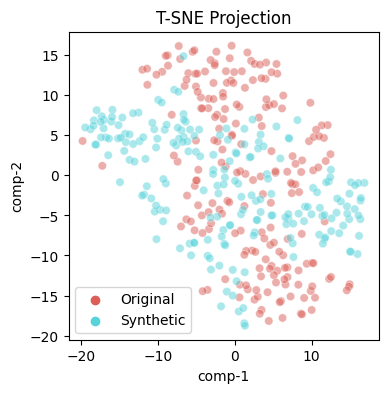

In [10]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2), alpha=0.5,
                data=df).set(title=f"T-SNE Projection")
plt.xlabel('comp-1')
plt.ylabel('comp-2')
plt.legend()

plt.show()

**Visualise adjacency matrix**

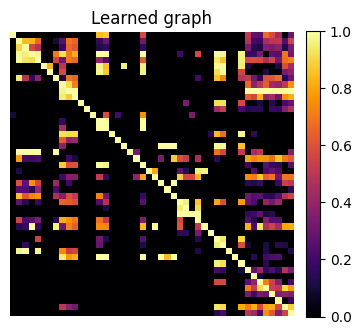

In [11]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap='inferno', interpolation='nearest', vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Learned graph')
plt.axis('off')
plt.show()

In [12]:
adj_df = pd.DataFrame(adj_matrix)
adj_df.to_csv("../data/ecoli_adj_matrix.csv")